In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/sample1_bms_data.csv')

print(df.head())
print(df.dtypes)

                          Time  Pack Amperage (Current)  Pack Voltage  \
0  Fri Feb 7 21:19:55 EST 2025                      0.0           0.0   
1  Fri Feb 7 21:19:55 EST 2025                     -3.9          40.9   
2  Fri Feb 7 21:19:55 EST 2025                     -3.9          40.9   
3  Fri Feb 7 21:19:56 EST 2025                     -3.9          40.9   
4  Fri Feb 7 21:19:56 EST 2025                     -3.9          40.9   

   Average Temperature (C)  Pack State of Charge (SOC)  
0                        0                         0.0  
1                       25                        12.5  
2                       25                        12.5  
3                       25                        12.5  
4                       25                        12.5  
Time                           object
Pack Amperage (Current)       float64
Pack Voltage                  float64
Average Temperature (C)         int64
Pack State of Charge (SOC)    float64
dtype: object


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/sample1_bms_data.csv')

x = df[['Pack Amperage (Current)', 'Pack Voltage', 'Average Temperature (C)']]
y = df[['Pack State of Charge (SOC)']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(x_train)}, Test set size: {len(x_test)}")

Training set size: 2880, Test set size: 721


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# Load dataset
df = pd.read_csv('C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/sample1_bms_data.csv')

# Voltage, Current, and Temperature are the input features, and SOC is the target variable
x = df[['Pack Amperage (Current)', 'Pack Voltage', 'Average Temperature (C)']]
y = df[['Pack State of Charge (SOC)']]

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 34.79826354980469
R² Score: 0.9583187699317932


Saved plot: C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/pack_soc_pred_vs_actual.png


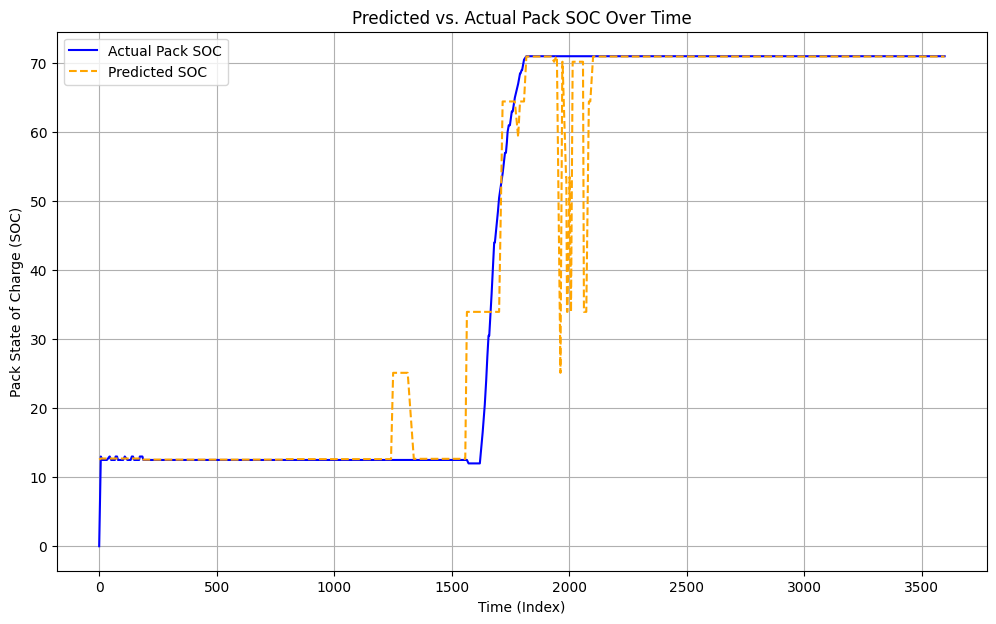

In [4]:
# Sort data for visualization
sorted_indices = np.argsort(y_test.index)  # Sort indices to maintain time order
sorted_x_test_index = y_test.index[sorted_indices]
sorted_y_test = np.array(y_test)[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

# Plot actual vs predicted SOC
plt.figure(figsize=(12, 7))
plt.plot(sorted_x_test_index, sorted_y_test, label='Actual Pack SOC', color='blue')
plt.plot(sorted_x_test_index, sorted_y_pred, label='Predicted SOC', color='orange', linestyle='--')
plt.xlabel("Time (Index)")
plt.ylabel("Pack State of Charge (SOC)")
plt.title("Predicted vs. Actual Pack SOC Over Time")
plt.legend()
plt.grid(True)

# Save the plot
save_path = "C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/pack_soc_pred_vs_actual.png"
plt.savefig(save_path)
print(f"Saved plot: {save_path}")

plt.show()

In [7]:
# Convert all arrays to 1D
sorted_x_test_index = np.array(sorted_x_test_index).flatten()
sorted_y_pred = np.array(sorted_y_pred).flatten()
sorted_y_test = np.array(sorted_y_test).flatten()

# Create a DataFrame with Time (Index), Predicted SOC, and Actual SOC
results_df = pd.DataFrame({
    'Time': sorted_x_test_index,  # Using the sorted test indices as Time
    'Predicted SOC': sorted_y_pred,
    'Actual SOC': sorted_y_test
})

# Define the save path
csv_save_path = "C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/pack_soc_predictions.csv"

# Save to CSV
results_df.to_csv(csv_save_path, index=False)

print(f"Saved CSV file: {csv_save_path}")

Saved CSV file: C:/Users/jmani/Documents/BatteryMLProject/src/data/four_files/pack_soc_predictions.csv
